In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np


In [2]:
# File to Load 
moviedata = pd.read_csv("moviesapi_clean.csv")
moviedata.head()
awarddata = pd.read_csv("moviesapi.csv")


In [3]:
moviedata.columns

Index(['Title', 'Year', 'Rated', 'Runtime', 'Genre', 'Director', 'Writer',
       'Language', 'Country', 'IMDB Rating', 'Revenue', 'Budget'],
      dtype='object')

In [4]:
moviedata["Language"].dtype

dtype('O')

In [5]:
#Languages
#The IMDb languages section records the languages spoken in titles in the database

#Create dataframe to store languages spoken in movie dataset
language_df = pd.DataFrame({'Title' : moviedata['Title'],
                           'Language': moviedata['Language']})

#print(moviedata['Language'])

# function to convert a string to a list
def Convert(string): 
    li = list(string.split(",")) 
    return li 

# Check the how language is returned for one movie
#avatar_language = language_df.loc[0, "Language"]
#print(avatar_language)
#Convert(avatar_language)


# list to hold all languages contained in dataset
l = []
for languages in moviedata['Language']:
    #print(languages)
    title_language_list = (Convert(str(languages)))
    for individual_language in title_language_list:
        if individual_language != "nan":
            l.append(individual_language)
#print(l)
        
#Create second dataframe to store and sort all languages spoken in movie dataset
language_df2 = pd.DataFrame({'Language':l})
#print(language_df2)


grouped_language_df2 = language_df2.groupby(["Language"])
language_count = grouped_language_df2["Language"].count()
movie_total = len(moviedata["Title"])
l_percentage = round(((language_count/movie_total)*100), 2)
#print(l_percentage)

# Convert to DataFrame
language_df3 = pd.DataFrame({"Language Count":language_count, "Percent Total": l_percentage})
language_df3
language_df3 = language_df3.sort_values("Language Count", ascending=False)
language_df3







,Language Count,Percent Total
Language,,
English,4306,93.98
Spanish,439,9.58
French,390,8.51
German,249,5.43
Italian,193,4.21
Russian,180,3.93
English,112,2.44
Japanese,108,2.36
Arabic,97,2.12


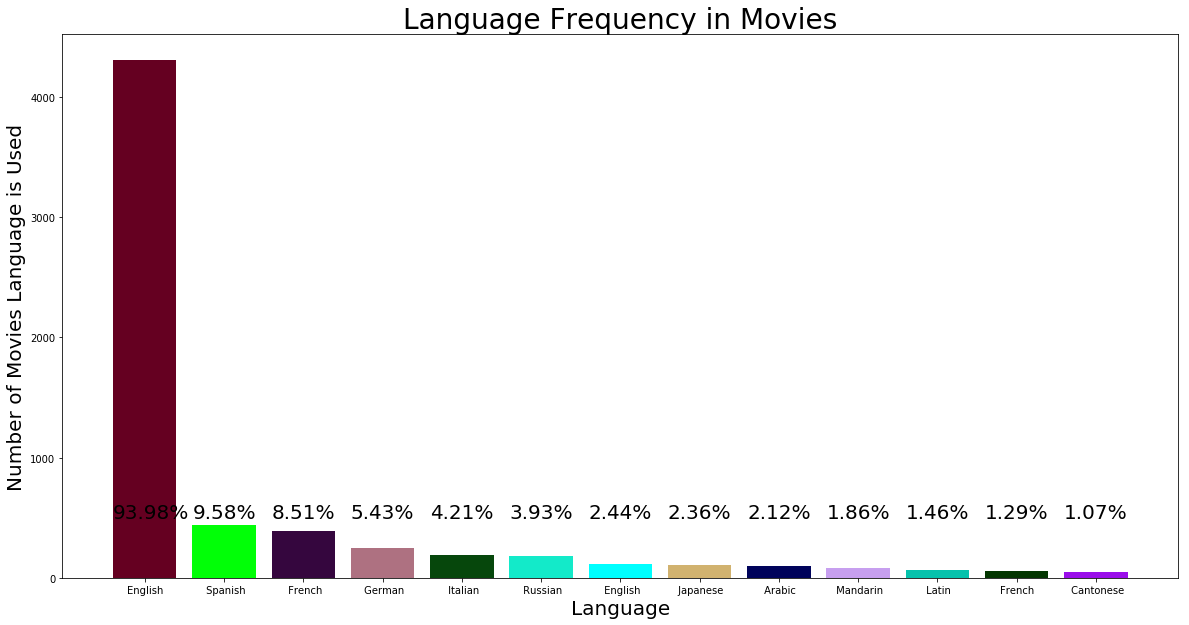

In [6]:
#Plot Bar Graph
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
import matplotlib.colors as colors



language_names = language_df3.index.values
x_axis = []
y_axis = []
label = []
colors_list = list(colors._colors_full_map.values())
color_counter = 25



for language_name in language_names:
    color_counter = color_counter + 5
    if language_df3.loc[language_name, "Percent Total"] > 1:
        x_axis.append(language_name)
        y_axis.append(language_df3.loc[language_name, "Language Count"])
        label.append((language_df3.loc[language_name,"Percent Total"]))

for j in range(len(x_axis)):
     ax.bar(x_axis[j], y_axis[j], color = colors_list[color_counter], align="center")
     color_counter = color_counter + 1
     label_percent = str(label[j]) + "%"
     ax.text(j-.4, 500, label_percent, style='normal', fontsize=20)


# Give the chart a title, x label, and y label
# Orient widths. Add labels, tick marks, etc. 
plt.title("Language Frequency in Movies", fontsize=28)
plt.xlabel("Language", fontsize=20)
plt.ylabel("Number of Movies Language is Used", fontsize=20)
plt.legend
#plt.ylim(0, 5000)




# Save the Figure
fig.savefig("Language Frequency in Movies")




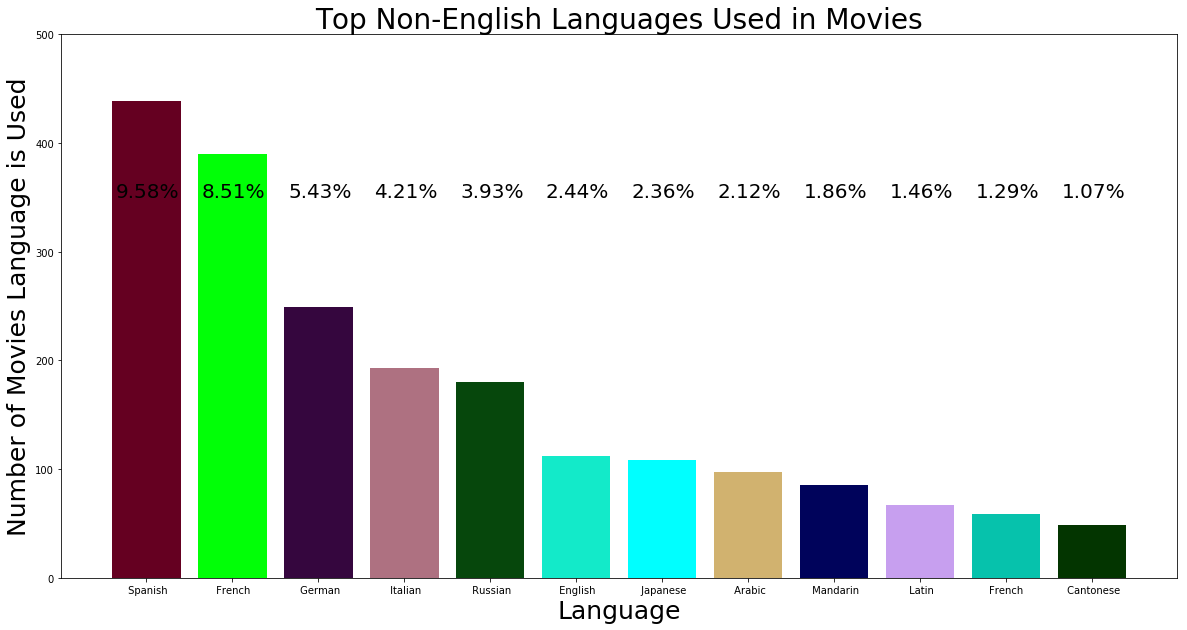

In [7]:
#Plot Bar Graph
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
import matplotlib.colors as colors



language_names = language_df3.index.values
x_axis = []
y_axis = []
label = []
colors_list = list(colors._colors_full_map.values())
color_counter = 25



for language_name in language_names:
    color_counter = color_counter + 5
    if language_df3.loc[language_name, "Percent Total"] > 1:
        x_axis.append(language_name)
        y_axis.append(language_df3.loc[language_name, "Language Count"])
        label.append((language_df3.loc[language_name,"Percent Total"]))


for j in range(1,len(x_axis)):
     ax.bar(x_axis[j], y_axis[j], color = colors_list[color_counter], align="center")
     color_counter = color_counter + 1
     label_percent = str(label[j]) + "%"
     ax.text(j-1.35, 350, label_percent, style='normal', fontsize=20)


# Give the chart a title, x label, and y label
# Orient widths. Add labels, tick marks, etc. 
plt.title("Top Non-English Languages Used in Movies", fontsize=28)
plt.xlabel("Language", fontsize=25)
plt.ylabel("Number of Movies Language is Used", fontsize=25)

plt.ylim(0, 500)




# Save the Figure
fig.savefig("Top Non-English Languages Used in Movies")

In [8]:
#Number of Languages Used in Movies 
# list to hold number of languages used in each movie of the dataset 

lan = []
lan_num = []
for languages in moviedata['Language']:
    b = (Convert(str(languages)))
    lan.append(b)
    if b[0]!="nan":
        lan_num.append(len(b))
    else:
        lan_num.append(0)
        
#print(len(lan_num))
    

#print(lan)


languages_df4 = pd.DataFrame({"Title":moviedata["Title"], "Languages Spoken in Movie":lan, "Number of Languages Spoken in Movie":lan_num})
#languages_df4
#languages_df4.to_csv("languages4.csv", index=False, header=True)

grouped_languages_df4 = languages_df4.groupby(["Number of Languages Spoken in Movie"])
grouped_languages_df4.count()
moviecount = grouped_languages_df4["Number of Languages Spoken in Movie"].count()
#lancount.head()

# Convert to DataFrame
languages_df5 = pd.DataFrame({"Number of Movies":moviecount})
languages_df5["Percent of Movies (%)"] = round((languages_df5["Number of Movies"] / movie_total)*100,2)
languages_df5 = languages_df5.sort_values("Percent of Movies (%)", ascending=False)
# Preview DataFrame
languages_df5
#languages_df4






,Number of Movies,Percent of Movies (%)
Number of Languages Spoken in Movie,,
1,2982,65.08
2,928,20.25
3,384,8.38
4,159,3.47
5,79,1.72
6,26,0.57
0,7,0.15
8,6,0.13
7,5,0.11


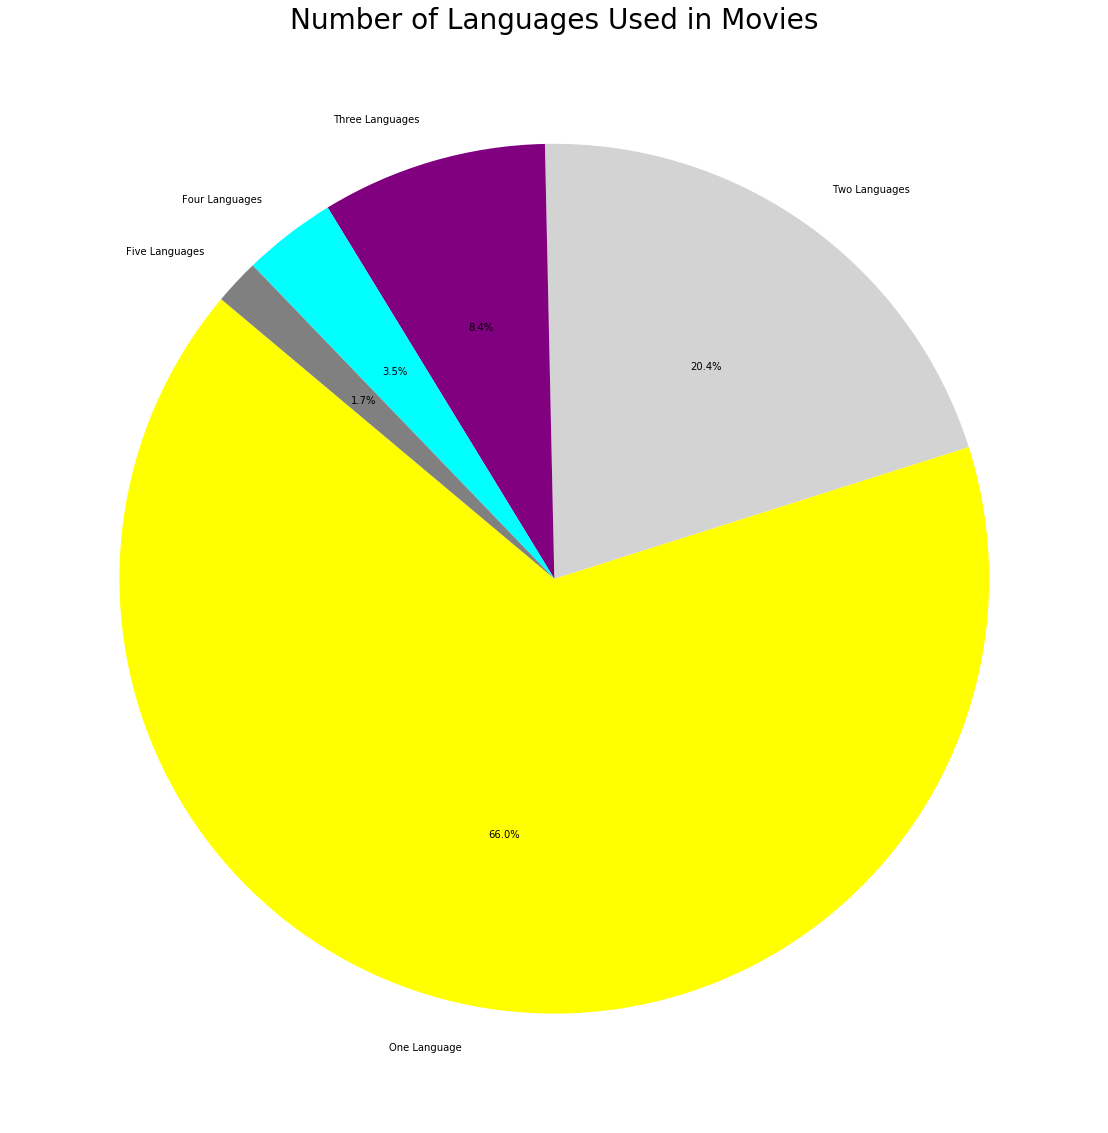

In [9]:
#Make Pie Chart
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(25)
languages_used = ["One Language", "Two Languages", "Three Languages", "Four Languages", "Five Languages"]
colors = ["yellow","lightgray","purple","cyan","gray"]
values = [3080, 954, 391, 162, 79]
plt.pie(values, labels= languages_used, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Number of Languages Used in Movies", fontsize=28)
fig.savefig("Number of Languages Used in Movies")
    

In [10]:
languages_df4
Hindi = []
for t in languages_df4.index.values:
    for item in languages_df4["Languages Spoken in Movie"][t]:
       test= item.strip()
       if str(test) == "Hindi":
            Hindi.append(languages_df4["Title"][t])
print(Hindi)


['The Avengers', 'Captain America: Civil War', '2012', 'Life of Pi', 'Around the World in 80 Days', 'A Good Day to Die Hard', 'Pixels', 'Seven Years in Tibet', 'The Ghost and the Darkness', 'Street Fighter: The Legend of Chun-Li', 'Baahubali: The Beginning', 'Dragonball Evolution', 'Indiana Jones and the Temple of Doom', 'Octopussy', 'A Passage to India', 'Million Dollar Arm', 'The Hundred-Foot Journey', 'Close Encounters of the Third Kind', 'Everyone Says I Love You', 'Slumdog Millionaire', 'Beavis and Butt-Head Do America', 'The Guru', 'Kabhi Alvida Naa Kehna', 'Housefull', 'The Best Exotic Marigold Hotel', 'Krrish', 'Kites', 'Jab Tak Hai Jaan', 'The Namesake', 'My Name Is Khan', 'Namastey London', 'Yeh Jawaani Hai Deewani', 'Ta Ra Rum Pum', 'Veer-Zaara', 'Bend It Like Beckham', 'Khiladi 786', 'Rang De Basanti', 'Dum Maaro Dum', 'Gandhi, My Father', 'Fugly', 'Airlift', 'Paa', 'Water', 'Water', 'The Other End of the Line', 'Chicken Tikka Masala', 'Hum To Mohabbat Karega', 'Roadside Ro

In [11]:
#Countries
#IMDb defines the country of a title as the place or places where the production companies for that title are based
#and therefore where the financing originated. This means, for example, even if a title is shot on location in France, if its production companies are all based in the USA, we record the country as USA.

# If a title is a multi-country production, the order the countries are entered into the addition/update forms is significant and will be reflected in the display order within IMDb.

#Create dataframe to store the countries of the movies
country_df = pd.DataFrame({'Title' : moviedata['Title'],
                           'Country': moviedata['Country']})

country_list = []
for country in country_df["Country"]:
    country_language_list = (Convert((country)))
    for each_country in country_language_list:
        each_country_no_spaces= each_country.strip()
        country_list.append((str(each_country_no_spaces)))
#print(country_list)

#Create second dataframe to store and sort all languages spoken in movie dataset
country_df2 = pd.DataFrame({'Country':country_list})
#country_df2

grouped_country_df2 = country_df2.groupby(["Country"])
country_count = grouped_country_df2["Country"].count()
#country_count.head()

# Convert to DataFrame
country_df3 = pd.DataFrame({"Country Count":country_count})
#country_df3
country_df3 = country_df3.sort_values("Country Count", ascending=False)
country_df3








,Country Count
Country,
USA,4020
UK,738
Germany,387
France,360
Canada,340
Australia,111
Japan,91
Italy,82
Spain,82


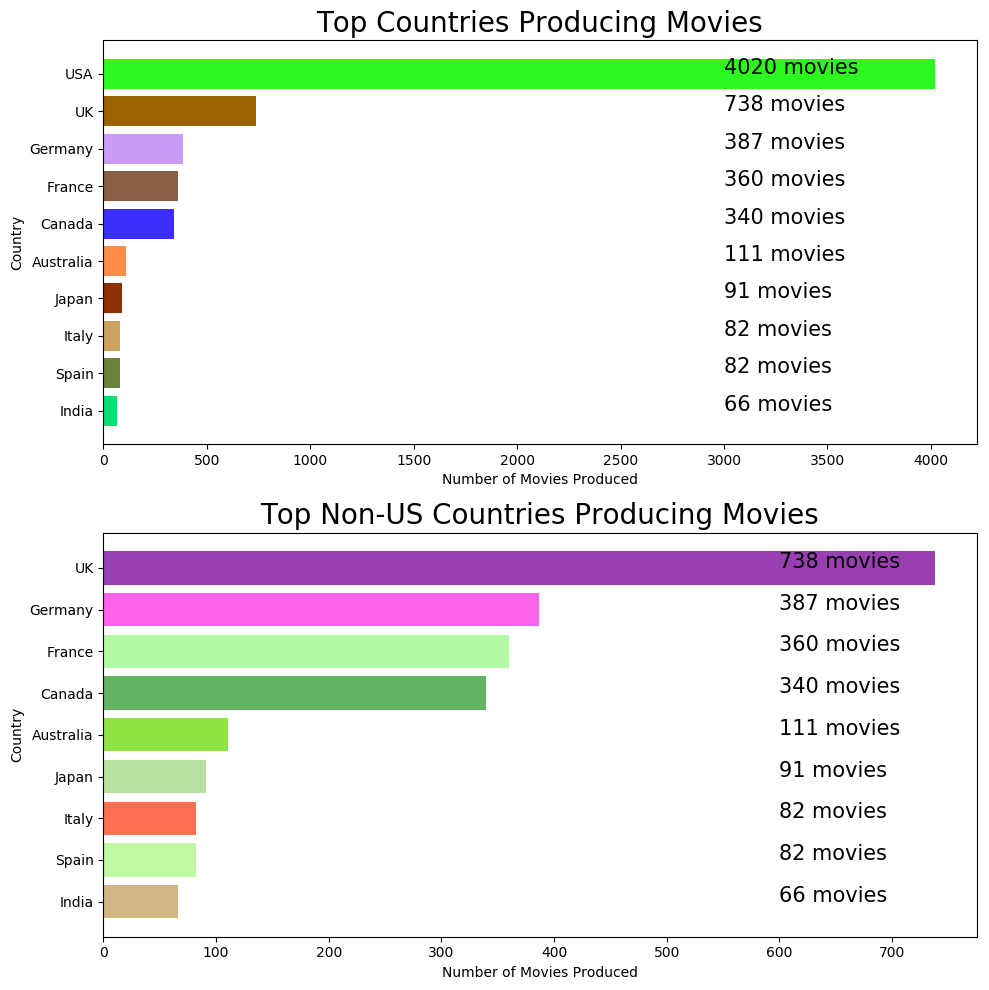

In [12]:
#Plot bar chart for country
fig, ax = plt.subplots(nrows = 2, ncols=1, figsize = (10,10), dpi=100)

import matplotlib.colors as colors

#fig.set_figheight(10)
#fig.set_figwidth(20)

country_names = country_df3.index.values
x1_axis = []
y1_axis = []
colors_list2 = list(colors._colors_full_map.values())
color_counter2 = 40
label2 = 0


for cn in range(10):
    color_counter2 = color_counter2 + 5
    x1_axis.append(country_names[cn])
    y1_axis.append(country_df3.loc[country_names[cn], "Country Count"])


#print(x1_axis)
#print(y1_axis)

for cn1 in range(len(x1_axis)):
     ax[0].barh(x1_axis[cn1], y1_axis[cn1], color = colors_list2[color_counter2], align="center")
     color_counter2 = color_counter2 + 1
     label3 = str(y1_axis[cn1])
     #print(label3)
     ax[0].text(3000, label2, label3 + " movies", style='normal', fontsize=15)
     label2 = label2 + 1
ax[0].invert_yaxis()
ax[0].set_title("Top Countries Producing Movies", fontsize=20)
ax[0].set_xlabel("Number of Movies Produced", fontsize=10)
ax[0].set_ylabel("Country", fontsize=10)



color_counter2 = 40
label2 = 0
for cn2 in range(1, len(x1_axis)):
     ax[1].barh(x1_axis[cn2], y1_axis[cn2], color = colors_list2[color_counter2], align="center")
     color_counter2 = color_counter2 + 1
     label3 = str(y1_axis[cn2])
     #print(label3)
     ax[1].text(600, label2, label3 + " movies", style='normal', fontsize=15)
     label2 = label2 + 1
ax[1].invert_yaxis()
ax[1].set_title("Top Non-US Countries Producing Movies", fontsize=20)
ax[1].set_xlabel("Number of Movies Produced", fontsize=10)
ax[1].set_ylabel("Country", fontsize=10)
plt.tight_layout()

fig.savefig("Countries Producing Movies")



In [13]:
#Profit Dataframe with Awards
profit_df = pd.DataFrame({'Title' : moviedata['Title'],
                          'Year': moviedata['Year'],
                          'Rated': moviedata['Rated'],
                          'Runtime': moviedata['Runtime'],
                          'Genre': moviedata['Genre'],
                          'Director':moviedata['Director'],
                          'Writer':moviedata['Writer'],
                          'IMDB Rating': moviedata['IMDB Rating'],
                          'Revenue': moviedata['Revenue'],
                          'Budget': moviedata['Budget'],
                          'Country':moviedata['Country'],
                          'Language':moviedata['Language']})
profit_df

profit_df[['Budget','Revenue']] = profit_df[['Budget','Revenue']].replace(0,np.NAN)
profit_df.dropna(subset=['Budget', 'Revenue'], inplace=True)
profit_df['Profit'] = profit_df['Revenue']-profit_df['Budget']
profit_df['Profit'] = profit_df['Profit'].apply(np.int64)
profit_df
profit_df.reset_index(inplace = True, drop = True)
#profit_df.index.values
profit_df




                      

,Title,Year,Rated,Runtime,Genre,Director,Writer,IMDB Rating,Revenue,Budget,Country,Language,Profit
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,7.8,2.787965e+09,237000000.0,"UK, USA","English, Spanish",2550965087
1,Pirates of the Caribbean: At World's End,2007,PG-13,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...",7.1,9.610000e+08,300000000.0,USA,"Mandarin, English",661000000
2,Spectre,2015,PG-13,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...",6.8,8.806746e+08,245000000.0,"UK, USA","English, Spanish, Italian, German, French",635674609
3,The Dark Knight Rises,2012,PG-13,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...",8.4,1.084939e+09,250000000.0,"UK, USA","English, Arabic",834939099
4,John Carter,2012,PG-13,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",6.6,2.841391e+08,260000000.0,USA,English,24139100
5,Spider-Man 3,2007,PG-13,139 min,"Action, Adventure, Sci-Fi",Sam Raimi,"Sam Raimi (screenplay), Ivan Raimi (screenplay...",6.2,8.908716e+08,258000000.0,USA,"English, French",632871626
6,Tangled,2010,PG,100 min,"Animation, Adventure, Comedy, Family, Fantasy,...","Nathan Greno, Byron Howard","Dan Fogelman (screenplay by), Jacob Grimm (bas...",7.8,5.917949e+08,260000000.0,USA,English,331794936
7,Avengers: Age of Ultron,2015,PG-13,141 min,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...",7.3,1.405404e+09,280000000.0,USA,"English, Korean",1125403694
8,Harry Potter and the Half-Blood Prince,2009,PG,153 min,"Adventure, Family, Fantasy, Mystery",David Yates,"Steve Kloves (screenplay), J.K. Rowling (novel)",7.6,9.339592e+08,250000000.0,"UK, USA",English,683959197
9,Batman v Superman: Dawn of Justice,2016,PG-13,151 min,"Action, Adventure, Fantasy, Sci-Fi",Zack Snyder,"Chris Terrio, David S. Goyer, Bob Kane (Batman...",6.5,8.732602e+08,250000000.0,USA,English,623260194


In [14]:
#Writer Analysis

#Removes parenthetical information from the Writers column
writer_df = profit_df.copy()
writer_df['Writer'] = writer_df['Writer'].str.replace(r"\(.*\)","")
writer_df[['Writer']] = writer_df[['Writer']].replace("NA",np.NAN)
writer_df.dropna(subset=['Writer'], inplace=True)
writer_df.reset_index(inplace = True, drop = True)

#Removes duplicate from a list
def Remove(simplelist): 
    final_list = [] 
    for num in simplelist: 
        test = (num.strip())
        #print(test)
        if test not in final_list: 
            final_list.append(test) 
    return final_list 

writer_df

Writers2 = []
Writers2_Count = []
for i in writer_df.index.values:
    w = Remove(Convert(writer_df.iloc[i,6]))
    #print(w)
    Writers2.append(w)
    Writers2_Count.append(len(w))
    

writer_df
writer_df["Writers2"] = (Writers2)
writer_df["Writers2 Count"] = Writers2_Count
del writer_df["Writer"]
writer_df

grouped_writer_df = writer_df.groupby(["Writers2 Count"])
sum_writers_count = grouped_writer_df["Writers2 Count"].count()
sum_writers_count 
profit_writers_count = grouped_writer_df["Profit"].sum()
profit_writers_count
average_IMDB_rating = grouped_writer_df["IMDB Rating"].mean()
average_IMDB_rating
writer_df2 = pd.DataFrame({"Number of Movies":sum_writers_count, "Profit":profit_writers_count, "Average IMDB Rating":average_IMDB_rating})
writer_df2


#nine = writer_df.loc[writer_df["Writers2 Count"] == 9, :]
#print(nine)




,Number of Movies,Profit,Average IMDB Rating
Writers2 Count,,,
1,2392,196527690398,6.634950
2,491,37042492100,6.384114
3,167,15831032166,6.219162
4,38,4960412941,6.178947
5,10,644815422,5.980000
6,5,227465497,6.800000
7,2,54258575,6.450000
9,1,-2896265,6.400000
11,1,26438988,4.300000


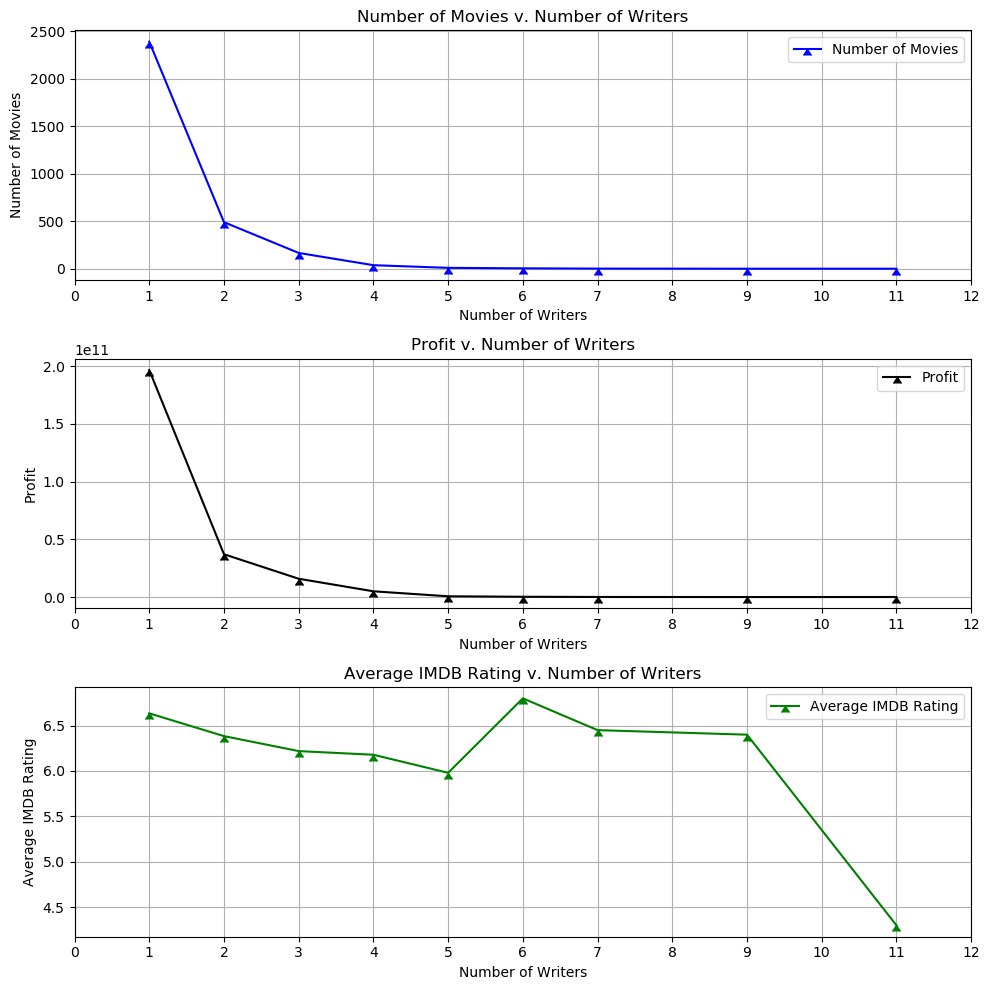

In [15]:
#Plot Charts for Number of Writers
fig, ax = plt.subplots(nrows = 3, ncols=1, figsize = (10,10), dpi=100)
x3 = writer_df2.index.values
y3 = writer_df2["Number of Movies"]
z3 = writer_df2["Profit"]
w3 = writer_df2["Average IMDB Rating"]

ax[1].plot(x3, z3, color="black", label="Profit", marker=6)

ax[1].set_xlim(0,12,1)
ax[1].grid(True)
ax[1].legend
ax[1].legend(loc="upper right")
ax[1].set_title("Profit v. Number of Writers")
ax[1].set_xlabel("Number of Writers")
ax[1].set_ylabel("Profit")
ax[1].set_xticks(np.arange(0, 13, 1.0))


ax[0].plot(x3, y3, color="blue", label="Number of Movies", marker=6)
ax[0].set_xlim(0,12,1)
ax[0].grid(True)
ax[0].legend
ax[0].legend(loc="upper right")
ax[0].set_title("Number of Movies v. Number of Writers")
ax[0].set_xlabel("Number of Writers")
ax[0].set_ylabel("Number of Movies")
ax[0].set_xticks(np.arange(0, 13, 1.0))

ax[2].plot(x3, w3, color="green", marker=6)
ax[2].set_xlim(0,12,1)
ax[2].grid(True)
ax[2].legend
ax[2].legend(loc="upper right")
ax[2].set_title("Average IMDB Rating v. Number of Writers")
ax[2].set_xlabel("Number of Writers")
ax[2].set_ylabel("Average IMDB Rating")
ax[2].set_xticks(np.arange(0, 13, 1.0))

plt.tight_layout()

fig.savefig("Profit v. Number of Writers.png")


In [16]:
#Oscars Analysis 
oscars_df = profit_df.copy()
oscars_df

awarddata.columns
get_oscars = pd.DataFrame({"Title":awarddata['Title'], "Awards":awarddata['Awards'], "Language":awarddata["Language"], "Country":awarddata["Country"], "IMDB Rating":awarddata["IMDB Rating"], "Director":awarddata["Director"]})
get_oscars
get_oscars.dropna(how='any', inplace=True)
get_oscars

get_oscars
only_oscars = get_oscars[get_oscars['Awards'].str.contains("Oscar")]
only_oscars
only_oscars_winners = only_oscars[only_oscars['Awards'].str.contains("Won")]
only_oscars_winners.reset_index(inplace = True, drop = True)
only_oscars_winners
oscar_count = []
for o in only_oscars_winners.index.values:
    oscar_count.append(int(only_oscars_winners["Awards"][o].split()[1]))
oscar_count
only_oscars_winners.insert(2, "Oscar Count", oscar_count, True) 
only_oscars_winners
only_oscars_winners.set_index("Title", inplace=True, drop=True)
only_oscars_winners
#oscars_df

only_oscars_winners = only_oscars_winners.sort_values("Oscar Count", ascending=False)
only_oscars_winners

#Count Number of languages
lan7 = []
lan_num7 = []
for languages in only_oscars_winners['Language']:
    c = (Convert(str(languages)))
    lan.append(c)
    if c[0]!="nan":
        lan_num7.append(len(c))
    else:
        lan_num.append(0)

only_oscars_winners["Language Count"] = lan_num7

only_oscars_winners

#Count Number of COuntries
con7 = []
con_num7 = []
for countries in only_oscars_winners['Country']:
    c1 = (Convert(str(countries)))
    con7.append(c1)
    if c1[0]!="nan":
        con_num7.append(len(c1))
    else:
        con_num7.append(0)

only_oscars_winners["Country Count"] = con_num7

only_oscars_winners

only_oscars_winners = only_oscars_winners[["Awards","Oscar Count", "Language", "Language Count", "Country", "Country Count", "IMDB Rating", "Director"]]
only_oscars_winners




,Awards,Oscar Count,Language,Language Count,Country,Country Count,IMDB Rating,Director
Title,,,,,,,,
Ben-Hur,Won 11 Oscars. Another 17 wins & 13 nominations.,11,English,1,USA,1,8.1,William Wyler
The Lord of the Rings: The Return of the King,Won 11 Oscars. Another 197 wins & 122 nominati...,11,"English, Quenya, Old English, Sindarin",4,"New Zealand, USA",2,8.9,Peter Jackson
Titanic,Won 11 Oscars. Another 111 wins & 77 nominations.,11,"English, Swedish, Italian",3,USA,1,7.8,James Cameron
West Side Story,Won 10 Oscars. Another 18 wins & 11 nominations.,10,"English, Spanish",2,USA,1,7.6,"Jerome Robbins, Robert Wise"
The English Patient,Won 9 Oscars. Another 53 wins & 75 nominations.,9,"English, German, Italian, Arabic",4,"USA, UK",2,7.4,Anthony Minghella
The Last Emperor,Won 9 Oscars. Another 47 wins & 16 nominations.,9,"English, Mandarin, Japanese",3,"UK, Italy, China, France",4,7.8,Bernardo Bertolucci
Gone with the Wind,Won 8 Oscars. Another 10 wins & 9 nominations.,8,English,1,USA,1,8.2,"Victor Fleming, George Cukor, Sam Wood"
Slumdog Millionaire,Won 8 Oscars. Another 144 wins & 126 nominations.,8,"English, Hindi, French, German",4,"UK, India",2,8.0,"Danny Boyle, Loveleen Tandan(co-director)"
From Here to Eternity,Won 8 Oscars. Another 14 wins & 7 nominations.,8,English,1,USA,1,7.7,Fred Zinnemann


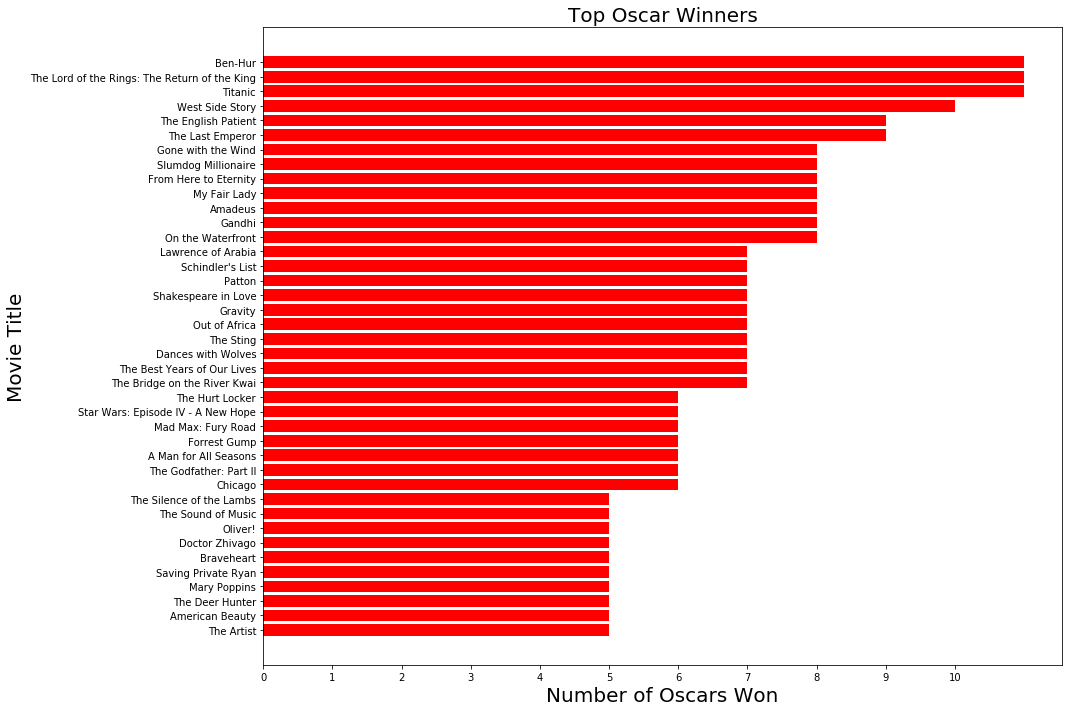

In [46]:
#Plot bar chart for oscars
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
import matplotlib.colors as colors

x = only_oscars_winners.index.values.tolist()
y = only_oscars_winners["Oscar Count"].tolist()
x1_axis = x[:40]
y1_axis = y[:40]
ax.barh(x1_axis,y1_axis, color = "red", align="center")
ax.invert_yaxis()
ax.set_title("Top Oscar Winners", fontsize=20)
ax.set_xlabel("Number of Oscars Won", fontsize=20)
ax.set_ylabel("Movie Title", fontsize=20)
ax.set_xticks(np.arange(0, 11, 1.0))
plt.tight_layout()

fig.savefig("Top Oscar Winners")







In [63]:
#Grouping


grouped_only_oscars_winners_imdb = only_oscars_winners.groupby(["Oscar Count"])
grp_imdb = grouped_only_oscars_winners_imdb["IMDB Rating"].mean()
grp_imdb.head()
grp_imdb2 = pd.DataFrame({"Average IMDB Rating":grp_imdb})
grp_imdb2.head()

only_oscars_winners40 = only_oscars_winners.head(40)
only_oscars_winners40
grouped_only_oscars_winners_language40 = only_oscars_winners40.groupby(["Oscar Count"])
grp_language = grouped_only_oscars_winners_language40["Language Count"].mean()
grp_language
print(f' average language count in top 40 is {only_oscars_winners40["Language Count"].mean()}')
print(f' average country count in top 40 is {only_oscars_winners40["Country Count"].mean()}')


#grouped_only_oscars_winners_country4o = only_oscars_winners.groupby(["Country Count"])
#grp_country = grouped_only_oscars_winners_country["Oscar Count"].sum()
#grp_country.head()
#grp_country = pd.DataFrame({"Oscar Count":grp_country})
#grp_country.head()



 average language count in top 40 is 2.425
 average country count in top 40 is 1.625


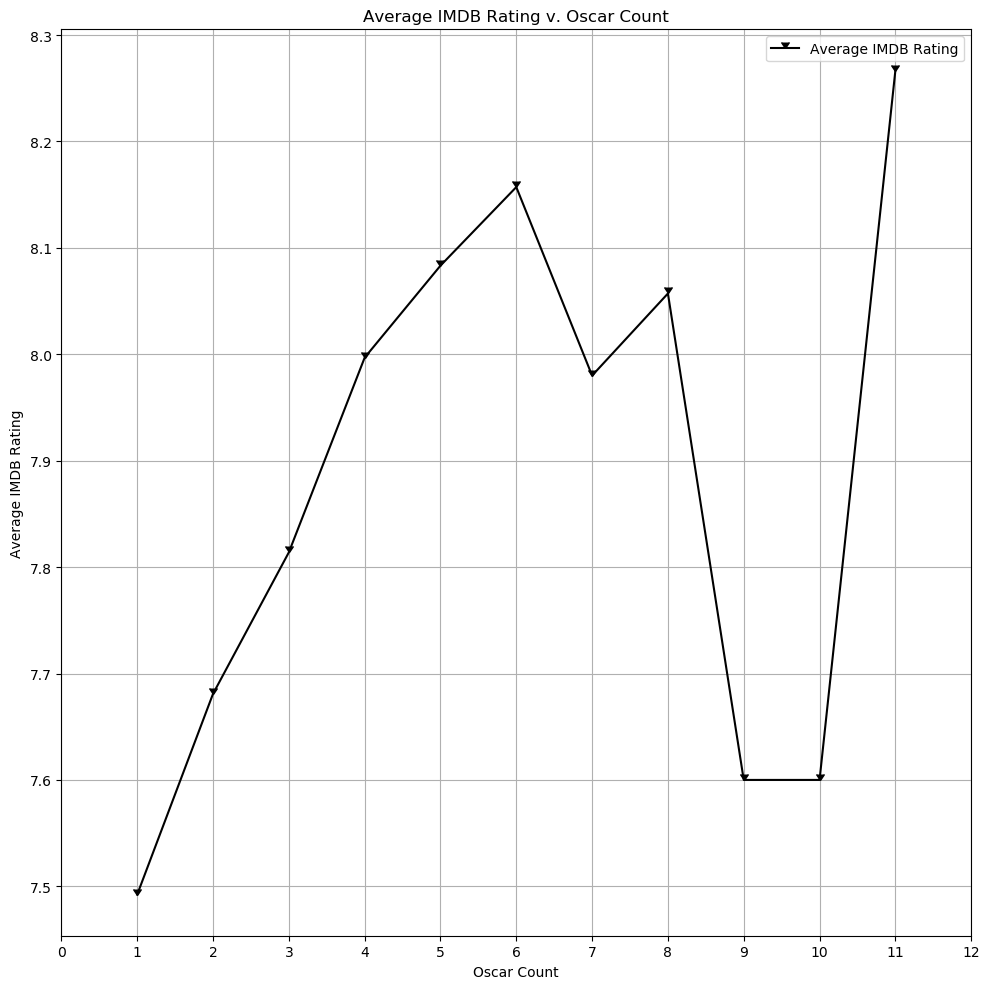

In [59]:
#Plot Charts for Number of Writers
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize = (10,10), dpi=100)
x3 = grp_imdb2.index.values
y3 = grp_imdb2["Average IMDB Rating"]




ax.plot(x3, y3, color="black", marker=7)


ax.set_xlim(0,9,1)
ax.grid(True)
ax.legend
ax.legend(loc="upper right")
ax.set_title("Average IMDB Rating v. Oscar Count")
ax.set_xlabel("Oscar Count")
ax.set_ylabel("Average IMDB Rating")
ax.set_xticks(np.arange(0, 13, 1.0))



plt.tight_layout()

fig.savefig("Average IMDB Rating v. Oscar Count.png")


